In [2]:
import pandas as pd

df_cwur = pd.read_csv (r'C:\Users\pc\Documents\GoMy Code related\cwurData.csv', sep = ',')
print (df_cwur)

      world_rank                            institution         country  \
0              1                     Harvard University             USA   
1              2  Massachusetts Institute of Technology             USA   
2              3                    Stanford University             USA   
3              4                University of Cambridge  United Kingdom   
4              5     California Institute of Technology             USA   
...          ...                                    ...             ...   
2195         996              University of the Algarve        Portugal   
2196         997                  Alexandria University           Egypt   
2197         998            Federal University of Ceará          Brazil   
2198         999                 University of A Coruña           Spain   
2199        1000        China Pharmaceutical University           China   

      national_rank  quality_of_education  alumni_employment  \
0                 1                

In [3]:
column_names = df_cwur.columns
for column in column_names:
    print(column + ' - ' + str(df_cwur[column].isnull().sum()))

world_rank - 0
institution - 0
country - 0
national_rank - 0
quality_of_education - 0
alumni_employment - 0
quality_of_faculty - 0
publications - 0
influence - 0
citations - 0
broad_impact - 200
patents - 0
score - 0
year - 0


In [4]:
df_cwur["broad_impact"] = df_cwur["broad_impact"].fillna(df_cwur["broad_impact"].mean())

print(df_cwur["broad_impact"].value_counts())

496.6995    200
642.0000     21
849.0000     20
800.0000     19
783.0000     17
           ... 
36.0000       1
50.0000       1
101.0000      1
11.0000       1
115.0000      1
Name: broad_impact, Length: 344, dtype: int64


In [27]:
df_cwur.corr()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
world_rank,1.000000,0.238553,0.676166,0.668529,0.663864,0.923037,0.895871,0.856573,0.853083,0.698214,-0.549098,0.320844
national_rank,0.238553,1.000000,0.211975,0.135342,0.222833,0.326857,0.161086,0.186797,0.170417,0.159440,-0.199756,0.102951
quality_of_education,0.676166,0.211975,1.000000,0.606421,0.786181,0.624657,0.645641,0.630455,0.435879,0.528120,-0.600541,0.427732
alumni_employment,0.668529,0.135342,0.606421,1.000000,0.558618,0.572096,0.527382,0.559200,0.371666,0.528219,-0.510374,0.427710
quality_of_faculty,0.663864,0.222833,0.786181,0.558618,1.000000,0.634423,0.656406,0.652186,0.428516,0.555107,-0.693540,0.484788
publications,0.923037,0.326857,0.624657,0.572096,0.634423,1.000000,0.874952,0.829912,0.831680,0.671558,-0.522111,0.318245
influence,0.895871,0.161086,0.645641,0.527382,0.656406,0.874952,1.000000,0.845207,0.830123,0.611811,-0.522837,0.318298
citations,0.856573,0.186797,0.630455,0.559200,0.652186,0.829912,0.845207,1.000000,0.769196,0.598728,-0.522438,0.328771
broad_impact,0.853083,0.170417,0.435879,0.371666,0.428516,0.831680,0.830123,0.769196,1.000000,0.508507,-0.430408,-0.000077
patents,0.698214,0.159440,0.528120,0.528219,0.555107,0.671558,0.611811,0.598728,0.508507,1.000000,-0.474810,0.368570


In [34]:
import numpy as np
from sklearn.model_selection import train_test_split
input

x = df_cwur["world_rank"]
y = df_cwur["quality_of_education"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 30)

In [16]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [33]:
x = df_cwur["world_rank"].values.reshape(-1, 1)
y = df_cwur["quality_of_education"].values.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 30)

model = LinearRegression()   
model.fit(x_train, y_train)  
predicted = model.predict(x_test) 


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 7578.399297515514
R squared 0.48778277046982876


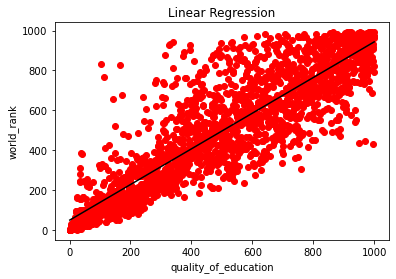

In [32]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("world_rank")
plt.xlabel("quality_of_education")
plt.plot(x,model.predict(x),color="k")
plt.show()